This notebook just processes the file of ALL the spoilers (all titles and genres that were scraped) -- to see if there are any patterns. I look at common words, bigrams, trigrams.

In later notebooks, I use a different stemmer/lemmatizer and different stopword dictionary - but this was my initial attempt.

In [1]:
import pandas as pd

In [2]:
import nltk

In [17]:
with open('/Users/MartinKihn/Desktop/spoiler_text_files/all_movies.txt', 'r') as file:
    text = file.read()

In [18]:
len(text)

7420645

In [19]:
type(text)

str

In [145]:
##text is a long string of all movie plots

In [20]:
##to lower case
text = text.lower()

In [21]:
text[1:100]

'he film opens “pre-snap,” before thanos (josh brolin) used the infinity stones to wipe out half of '

In [22]:
import re

In [23]:
##remove punctuation
text = text.replace('[^\w\s]', '')

In [24]:
##also remove parentheses
text = text.replace('[()]', '')

In [25]:
text[1:100]

'he film opens “pre-snap,” before thanos (josh brolin) used the infinity stones to wipe out half of '

In [26]:
text[100:300]

'all life in the universe. clint barton aka hawkeye (jeremy renner) is still on house arrest. he is spending a lovely day with his two sons, his wife (linda cardellini), and his daughter (whom he is te'

In [33]:
import nltk
from nltk.corpus import stopwords

In [34]:
stop = nltk.corpus.stopwords.words('english')

In [42]:
text_clean=list()
for word in text:
    if word not in stop:
        text_clean.append(word)
    else:
        continue

In [43]:
len(text), len(text_clean), type(text_clean)

(1350131, 737241, list)

In [44]:
##turns list back into string
text_clean = " ".join(text_clean)

In [45]:
type(text_clean), len(text_clean)

(str, 5034270)

In [50]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [51]:
stemmed_text = ' '.join([stemmer.stem(word) for word in text_clean.split()])

In [52]:
len(text_clean), len(stemmed_text)

(5034270, 4590922)

In [53]:
text_clean[100:200], stemmed_text[100:200]

('on aka hawkeye (jeremy renner) still house arrest. spending lovely day two sons, wife (linda cardell',
 'hawkey (jeremi renner) still hous arrest. spend love day two sons, wife (linda cardellini), daughter')

In [165]:
##now we have two long strings:
##text_clean is string w/out stop words and punc
##stemmed_text is text_clean stemmed

In [54]:
##now want to count frequencies of words
from collections import Counter

In [55]:
stemmed_most_common = Counter(stemmed_text.split()).most_common()

In [56]:
stemmed_most_common[0:10]

[('get', 7396),
 ('tell', 6551),
 ('go', 4332),
 ('see', 4252),
 ('find', 4247),
 ('say', 4221),
 ('take', 4132),
 ('tri', 3882),
 ('back', 3441),
 ('goe', 3301)]

In [57]:
from nltk import FreqDist

In [58]:
fdist1 = FreqDist(stemmed_text.split())

In [59]:
print(fdist1.most_common(50))

[('get', 7396), ('tell', 6551), ('go', 4332), ('see', 4252), ('find', 4247), ('say', 4221), ('take', 4132), ('tri', 3882), ('back', 3441), ('goe', 3301), ('make', 3065), ('ask', 2975), ('one', 2887), ('kill', 2621), ('come', 2552), ('him.', 2397), ('want', 2380), ('start', 2322), ('run', 2227), ('call', 2188), ('two', 1987), ('know', 1904), ('meet', 1903), ('give', 1867), ('look', 1805), ('her.', 1783), ('use', 1782), ('leav', 1745), ('show', 1695), ('also', 1647), ('like', 1647), ('help', 1643), ('head', 1547), ('name', 1418), ('man', 1371), ('work', 1354), ('talk', 1344), ('time', 1327), ('home', 1313), ('anoth', 1291), ('bring', 1287), ('sinc', 1285), ('walk', 1261), ('new', 1257), ('turn', 1255), ('think', 1243), ('him,', 1210), ('next', 1205), ('friend', 1176), ('them.', 1154)]


In [60]:
from wordcloud import WordCloud

In [61]:
wc = WordCloud(background_color="white", max_words=2000, 
              width=800, height=400)
wc.generate(stemmed_text)

In [62]:
import matplotlib.pyplot as plt

In [63]:
%matplotlib inline

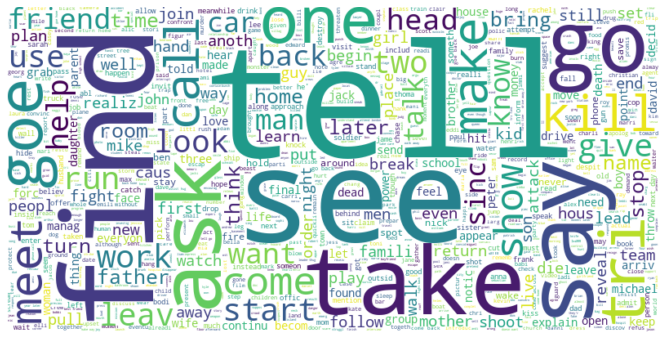

In [64]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

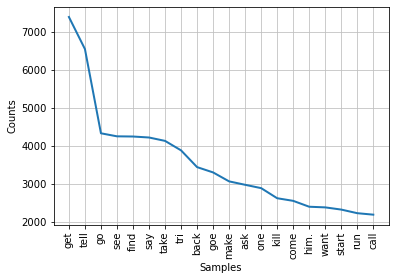

In [65]:
fdist1.plot(20)

In [193]:
##would like to do n-grams (2-3)
##finally: tf-idf across the genres

In [66]:
stemmed_list = stemmed_text.split()

In [67]:
bigrams = (pd.Series(nltk.ngrams(stemmed_list, 2)).value_counts())[:20]

In [68]:
bigrams

(tri, get)          406
(go, back)          277
(come, across)      228
(goe, back)         220
(next, day,)        216
(make, way)         211
(look, like)        207
(get, back)         183
(come, back)        182
(even, though)      182
(kill, him.)        159
(doesn’t, want)     157
(take, care)        156
(return, home)      137
(new, york)         127
(next, morning,)    126
(tri, make)         120
(next, day)         119
(tri, find)         119
(get, away)         119
dtype: int64

In [69]:
trigrams = (pd.Series(nltk.ngrams(stemmed_list, 3)).value_counts())[:20]

In [70]:
trigrams

(get, phone, call)       37
(make, look, like)       36
(tri, find, way)         26
(make, thing, worse,)    24
(return, home, find)     23
(say, doesn’t, want)     22
(see, look, like)        19
(new, york, citi)        19
(young, woman, name)     18
(make, seem, like)       17
(final, text, state)     17
(make, way, back)        16
(one, last, time)        16
(decid, go, back)        16
(find, way, get)         16
(gain, upper, hand)      15
(make, way, toward)      15
(goe, home, find)        15
(start, make, way)       14
(tell, doesn’t, want)    14
dtype: int64

In [71]:
trigrams = trigrams[:12]

Text(0.5, 0, '# of Occurances')

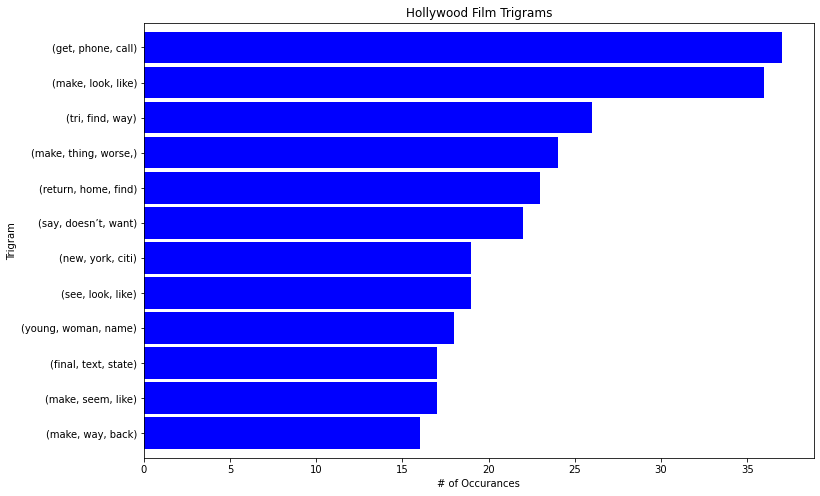

In [73]:
trigrams.sort_values().plot.barh(color='blue',
                                width=.9, figsize=(12,8))
plt.title('Hollywood Film Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
##stop here - this all works